In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from pipeline import *
from utils import *


df1C = pd.read_csv("./A2390C/centroid_analysis_A2390C_m2aper_all_weight_mean.csv")
df1C.ID = df1C.ID.astype("str")+"C"
df1E = pd.read_csv("./A2390SE/centroid_analysis_A2390SE_m2aper_all_weight_mean.csv")
df1E.ID = df1E.ID.astype("str")+"E"
df1W = pd.read_csv("./A2390NW/centroid_analysis_A2390NW_m2aper_all_weight_mean.csv")
df1W.ID = df1W.ID.astype("str")+"W"

Tab = pd.merge(df1E, df1W, how="outer")
Tab = pd.merge(df1C, Tab, how="outer")
# df2 = pd.read_csv("./A2465C/centroid_analysis_A2465C_aper.csv")
# Tab = pd.concat([df1, df1E, df1W, df2])

Tab_c = Tab[Tab.type=='c']
Tab_v = Tab[Tab.type=='v']

diff_centroid_v_all = Tab_v.diff_centroid
diff_centroid_c_all = Tab_c.diff_centroid
diff_angle_v_all = Tab_v.diff_angle
diff_angle_c_all = Tab_c.diff_angle

In [2]:
# Clean control smaple
match_c1 = np.array([],dtype="int64")
match_c2 = np.array([],dtype="int64")
for i in Tab_c.index[:len(Tab_c)//2+1]:
    Coords_c = SkyCoord(Tab_c.drop([i]).ra, Tab_c.drop([i]).dec, frame='icrs', unit="deg")
    c = SkyCoord(Tab_c.ra[i], Tab_c.dec[i], frame='icrs', unit="deg")
    # Match two catalogs
    idx, d2d, d3d = c.match_to_catalog_sky(Coords_c)
    
    if d2d < 1 * u.arcsec:
        print("Obj:%d  Matched:%d"%(i, idx+1))
        match_c1 = np.append(match_c1, i)
        match_c2 = np.append(match_c2, idx+1)
        
Tab_mc = Tab_c.copy()
for m1, m2 in zip(match_c1, match_c2):
    m = m1 if Tab_c.dist_edge[m1]<Tab_c.dist_edge[m2] else m2
    Tab_mc = Tab_mc.drop(m)
Tab_mc

Obj:107  Matched:2156
Obj:108  Matched:2148
Obj:109  Matched:2169
Obj:111  Matched:2155
Obj:112  Matched:2168


KeyboardInterrupt: 

In [3]:
Tab_mc = Tab_c.sample(frac=0.9)
Tab_mc = Tab_mc[Tab_mc.mag_auto<22.7]

In [153]:
Tab_v = Tab_v.reset_index(drop=True)
Tab_v

,ID,ra,dec,redshift,SNR_Ha,SNR_OIII,mag_auto,R_petro,dist_edge,dist_cen,diff_angle,diff_centroid,type
0,14C,328.437389,17.579927,0.249999,22.872031,16.610540,20.518691,5.94,8.027268,1342.107331,74.447111,1.512185,v
1,34C,328.396718,17.580286,0.247190,9.448132,12.643702,23.495175,5.94,20.008673,1290.363598,115.360678,1.705608,v
2,100C,328.431868,17.587243,0.254723,3.733020,6.373497,21.901404,8.58,94.148430,1247.972451,NaN,0.000000,v
3,114C,328.485076,17.590044,0.234502,5.588553,5.887732,21.827195,5.28,59.486350,1465.423265,NaN,0.000000,v
4,167C,328.437613,17.595225,0.242466,6.312940,9.276380,21.375922,6.60,184.529109,1179.069236,128.675938,1.351261,v
5,224C,328.329826,17.598383,0.240483,5.442454,5.617711,21.969056,5.28,199.965087,1339.517001,NaN,0.000000,v
6,227C,328.422475,17.598558,0.256343,5.990316,6.246249,22.057381,8.58,225.876701,1102.965215,73.139731,0.000000,v
7,267C,328.309657,17.602222,0.255119,5.049703,6.283411,23.760908,8.58,46.603353,1444.317460,105.936133,0.873056,v
8,285C,328.393655,17.607061,0.249965,35.102876,12.207967,19.723507,5.28,137.691339,994.522068,72.154259,0.352193,v
9,313C,328.332677,17.607293,0.244811,5.324293,5.537594,22.994410,7.26,180.118525,1241.418081,NaN,0.000000,v


In [5]:
match_1 = np.array([],dtype="int64")
match_2 = np.array([],dtype="int64")
for i in Tab_v.index[:len(Tab_v)//2+1]:
#     Coords_v = SkyCoord(Tab_v.drop([i]).ra, Tab_v.drop([i]).dec, frame='icrs', unit="deg")
    Coords_v = SkyCoord(Tab_v.drop([i]).ra, Tab_v.drop([i]).dec, frame='icrs', unit="deg")
    c = SkyCoord(Tab_v.ra[i], Tab_v.dec[i], frame='icrs', unit="deg")
    # Match two catalogs
    idx, d2d, d3d = c.match_to_catalog_sky(Coords_v)
    
    if d2d < 2 * u.arcsec:
        print("Obj:%d  Matched:%d"%(i, idx+1))
        match_1 = np.append(match_1, i)
        match_2 = np.append(match_2, idx+1)
#     plt.hist(d2d.to(u.arcsec).value, range=[0,1])

Obj:0  Matched:158
Obj:4  Matched:153
Obj:10  Matched:149
Obj:44  Matched:181
Obj:47  Matched:180
Obj:58  Matched:174
Obj:59  Matched:173
Obj:60  Matched:176
Obj:102  Matched:178


In [6]:
print(Tab_v.iloc[0])
print(Tab_v.iloc[161])

ID                    14C
ra                328.437
dec               17.5799
redshift         0.249999
SNR_Ha             22.872
SNR_OIII          16.6105
mag_auto          20.5187
R_petro              5.94
dist_edge         8.02727
dist_cen          1342.11
diff_angle        74.4471
diff_centroid     1.51219
type                    v
Name: 0, dtype: object
ID                  1699E
ra                328.513
dec               17.5725
redshift         0.221252
SNR_Ha            5.20433
SNR_OIII          3.59652
mag_auto          20.8018
R_petro              4.62
dist_edge         119.798
dist_cen          1803.93
diff_angle            NaN
diff_centroid           0
type                    v
Name: 161, dtype: object


In [154]:
# Delete repeated detections with smaller S/N
Tab_m = Tab_v.copy()
for m1, m2 in zip(match_1, match_2):
    m = m1 if Tab_v.SNR_Ha[m1]<Tab_v.SNR_Ha[m2] else m2
    print(m)
    Tab_m = Tab_m.drop(m)
    
# Tab_m = Tab_m[abs(Tab_m.redshift-0.228)<0.012]
# d_centroid_v = Tab_m.diff_centroid
# d_centroid_c = Tab_mc.diff_centroid
# d_angle_v = Tab_m.diff_angle
# d_angle_c = Tab_mc.diff_angle

# sns.distplot(Tab_m.redshift)
# Tab_m

0
153
149
181
180
174
173
176
178


In [163]:
Tab_m.ID.str.contains("C")

1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
30      True
       ...  
203    False
204    False
205    False
206    False
207    False
208    False
209    False
210    False
211    False
212    False
213    False
214    False
215    False
216    False
217    False
218    False
219    False
220    False
221    False
222    False
223    False
224    False
225    False
226    False
227    False
228    False
229    False
230    False
231    False
232    False
Name: ID, Length: 224, dtype: bool

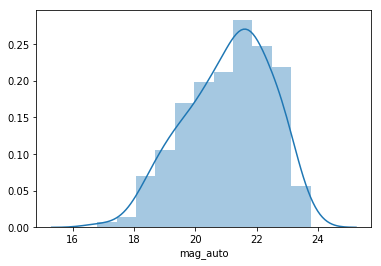

In [155]:
sns.distplot(Tab_m[Tab_m.ID].mag_auto)

,ID,ra,dec,redshift,SNR_Ha,SNR_OIII,mag_auto,R_petro,dist_edge,dist_cen,diff_angle,diff_centroid,type
10,325C,328.413625,17.609707,0.230934,20.716203,18.137256,21.316404,5.28,223.391717,965.621739,117.899307,1.591557,v
13,375C,328.458421,17.617898,0.225814,12.965420,10.640715,19.285750,5.28,208.210774,1047.182788,172.316553,1.544125,v
15,397C,328.454840,17.622009,0.226210,25.541735,9.151123,18.616026,4.62,221.211496,987.759195,72.575333,1.256733,v
16,463C,328.392651,17.622805,0.224590,9.812738,5.632056,21.972286,5.28,311.884703,821.108556,158.153774,0.951854,v
22,600C,328.479545,17.637149,0.229382,16.843756,5.102323,21.272959,5.28,109.451893,1040.967475,144.860615,1.872803,v
24,633C,328.452914,17.639550,0.229348,8.862522,7.741285,20.427216,4.62,244.911506,818.341492,169.198693,1.710137,v
33,831C,328.364305,17.655359,0.224987,7.608949,4.683714,21.866541,5.94,281.760846,612.597424,137.815195,1.974813,v
36,919C,328.460860,17.663075,0.222608,8.585060,3.854601,20.853093,5.28,85.770195,711.362176,12.432184,2.743868,v
38,946C,328.420586,17.663887,0.225021,6.896348,3.668326,21.883323,7.26,213.657014,398.249489,163.458136,1.746870,v
40,1051C,328.375245,17.673306,0.221056,13.152641,4.477666,19.913423,5.94,113.161263,389.580755,115.073299,0.434922,v


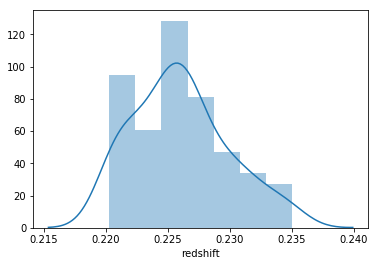

In [139]:
cond = (Tab_m.SNR_Ha/Tab_m.SNR_OIII>1) & (Tab_m.mag_auto<22.5) & (Tab_m.mag_auto>18.5) #& (Tab_m.SNR_Ha>6.) 

cond = cond & (Tab_m.diff_centroid<10) & (Tab_m.dist_edge>50) 
        
Tab_ma = Tab_m[cond]
Tab_ma = Tab_ma[Tab_ma.diff_centroid>0]
sns.distplot(Tab_ma.redshift)
d_centroid_v = Tab_ma.diff_centroid
d_centroid_c = Tab_mc.diff_centroid
d_angle_v = Tab_ma.diff_angle
d_angle_c = Tab_mc.diff_angle
Tab_ma

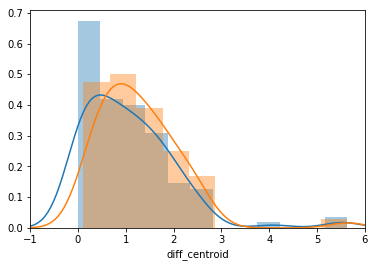

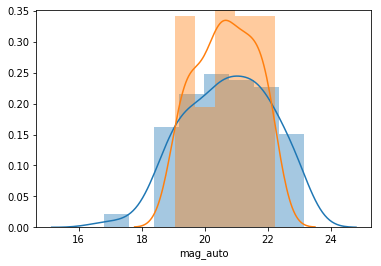

In [129]:
sns.distplot(Tab_m.diff_centroid)
sns.distplot(Tab_ma.diff_centroid)
plt.xlim(-1,6)
plt.show()
sns.distplot(Tab_m.mag_auto)
sns.distplot(Tab_ma.mag_auto)

## APER A2390C + A2390E + A2390W

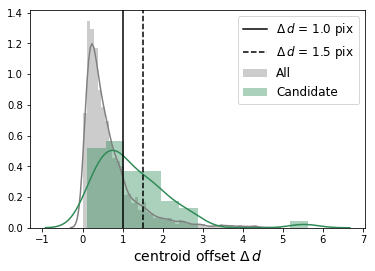

In [10]:
draw_centroid_offset(d_centroid_v, d_centroid_c,crit=[1,1.5])
# plt.savefig("/home/qliu/Pictures/20190312/offset_A2390C+W+E.pdf",dpi=100)

# of offset > 50% : 90
# of offset > 80% : 35


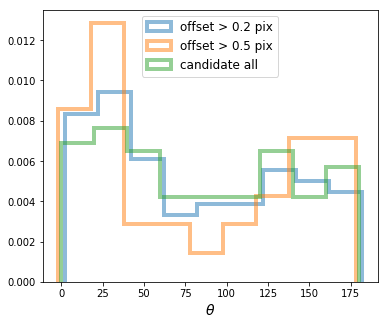

In [354]:
# APER
plt.figure(figsize=(6,5))
draw_angle_candidate(d_angle_v, d_centroid_v,d_centroid_c, crit=[0.5, 0.8], b=10)

# of offset > 50% : 86
# of offset > 100% : 46


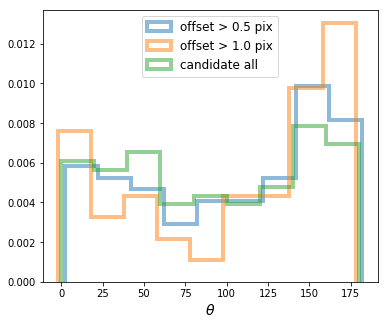

In [191]:
# 1 APER
plt.figure(figsize=(6,5))
draw_angle_candidate(d_angle_v, d_centroid_v,d_centroid_c, crit=[0.5, 1.], b=10)

# of offset > 100% : 61
# of offset > 150% : 29


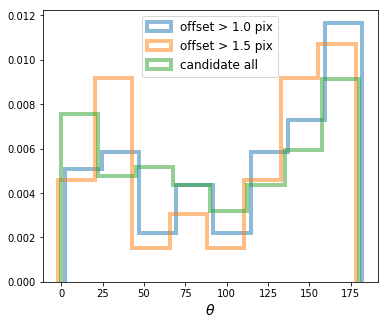

In [33]:
# 2 APER
plt.figure(figsize=(6,5))
draw_angle_candidate(d_angle_v, d_centroid_v,d_centroid_c, crit=[1, 1.5], b=9)

# of offset > 100% : 62
# of offset > 150% : 34


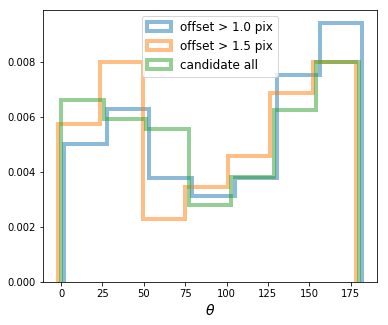

In [51]:
# 2 APER
plt.figure(figsize=(6,5))
draw_angle_candidate(d_angle_v, d_centroid_v,d_centroid_c, crit=[1, 1.5], b=8)

# of offset > 50% : 143
# of offset > 100% : 94


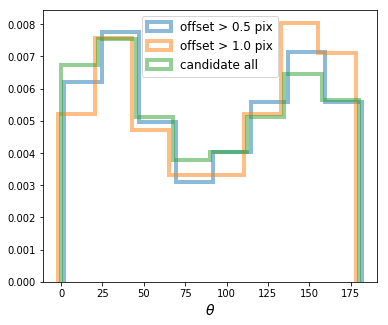

In [125]:
# 2 APER
plt.figure(figsize=(6,5))
draw_angle_candidate(d_angle_v, d_centroid_v,d_centroid_c, crit=[.5, 1.], b=9)

# of offset > 50% : 50
# of offset > 100% : 22


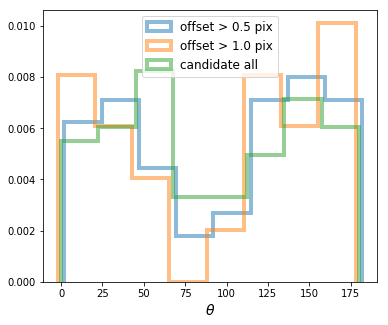

In [256]:
# 2 APER
plt.figure(figsize=(6,5))
draw_angle_candidate(d_angle_v, d_centroid_v,d_centroid_c, crit=[.5, 1.], b=9)

# of offset > 50% : 47
# of offset > 75% : 22


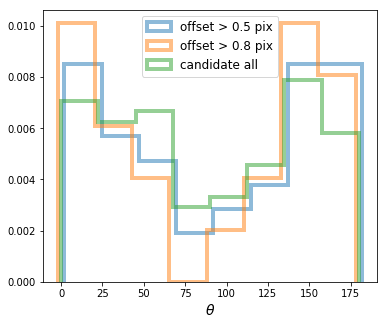

In [291]:
# 2 APER
plt.figure(figsize=(6,5))
draw_angle_candidate(d_angle_v, d_centroid_v,d_centroid_c, crit=[.5, .75], b=9)

# of offset > 50% : 78
# of offset > 100% : 50


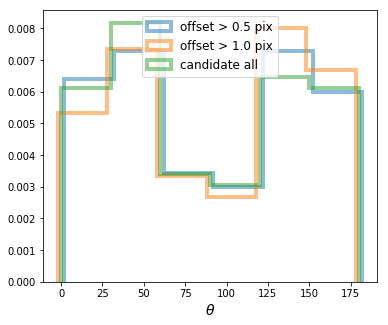

In [46]:
# m2 APER
plt.figure(figsize=(6,5))
draw_angle_candidate(d_angle_v, d_centroid_v,d_centroid_c, crit=[.5, 1.], b=7)

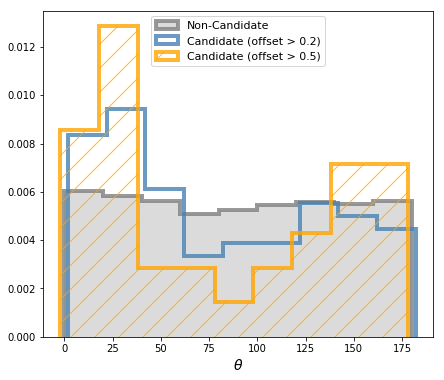

In [355]:
# Aper
plt.figure(figsize=(7,6))
draw_angle_compare(d_angle_v, d_centroid_v, 
                   d_angle_c, d_centroid_c, crit=[0.5,0.8], b=10)

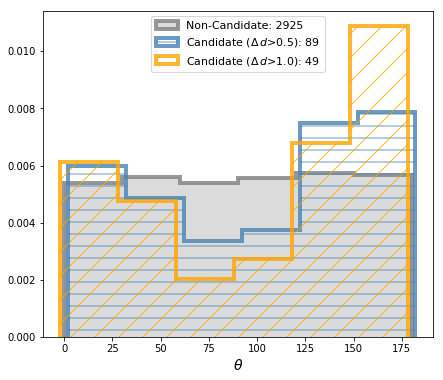

In [196]:
# 1Aper
plt.figure(figsize=(7,6))
draw_angle_compare(d_angle_v, d_centroid_v, 
                   d_angle_c, d_centroid_c, crit=[0.5,1.], b=7)

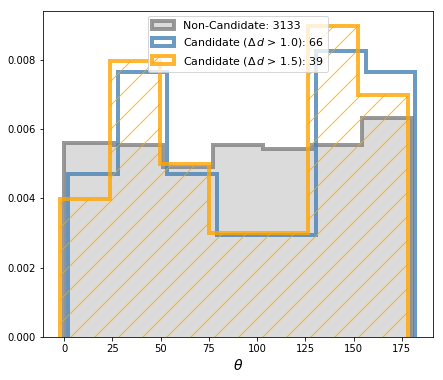

In [31]:
# 2 Aper
plt.figure(figsize=(7,6))
draw_angle_compare(d_angle_v, d_centroid_v, 
                   d_angle_c, d_centroid_c, crit=[1.,1.5], b=8)
plt.savefig("/home/qliu/Pictures/20190312/A2390C+W+E.pdf",dpi=100)

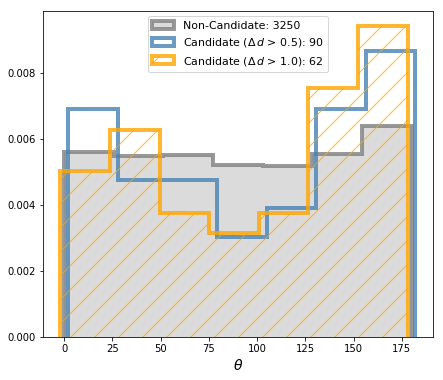

In [67]:
# 2 Aper
plt.figure(figsize=(7,6))
draw_angle_compare(d_angle_v, d_centroid_v, 
                   d_angle_c, d_centroid_c, crit=[0.5,1.], b=8)

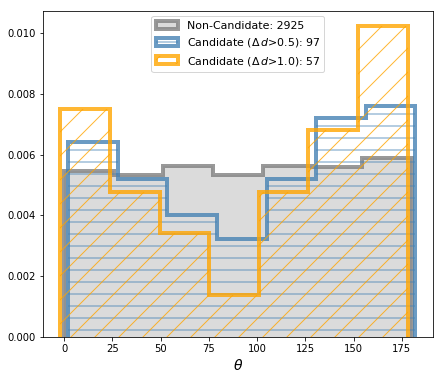

In [207]:
# 2 Aper
plt.figure(figsize=(7,6))
draw_angle_compare(d_angle_v, d_centroid_v, 
                   d_angle_c, d_centroid_c, crit=[.5,1.], b=8)

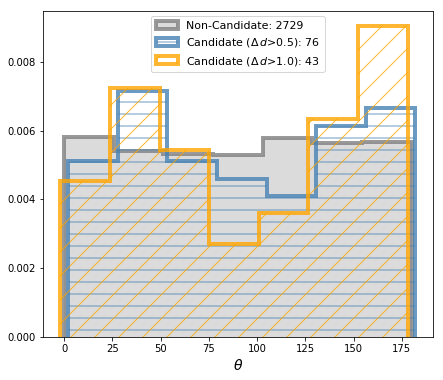

In [301]:
# 2 Aper
plt.figure(figsize=(7,6))
draw_angle_compare(d_angle_v, d_centroid_v, 
                   d_angle_c, d_centroid_c, crit=[.5,1.], b=8)

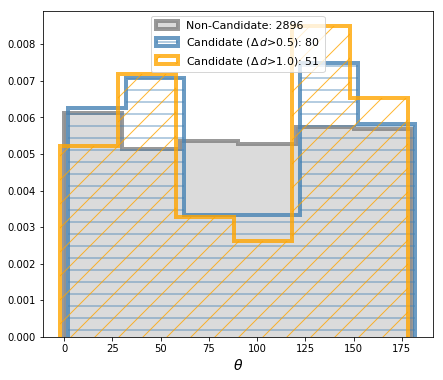

In [14]:
# m2 Aper
plt.figure(figsize=(7,6))
draw_angle_compare(d_angle_v, d_centroid_v, 
                   d_angle_c, d_centroid_c, crit=[.5,1.], b=7)

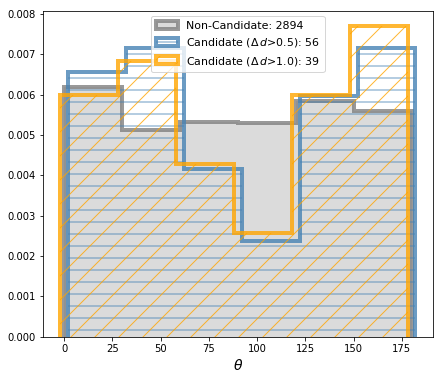

In [149]:
# m2 Aper
plt.figure(figsize=(7,6))
draw_angle_compare(d_angle_v, d_centroid_v, 
                   d_angle_c, d_centroid_c, crit=[.5,1.], b=7)

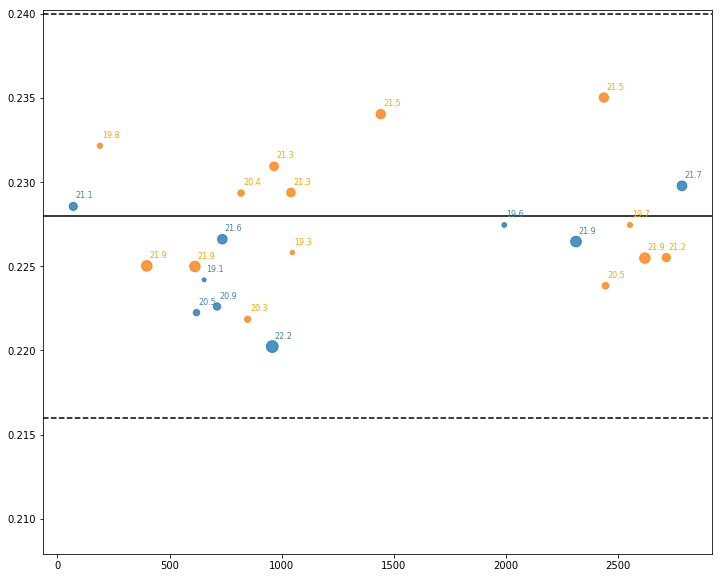

In [136]:
cond1 =  (d_centroid_v>1.5)&(d_angle_v<90)
cond2 = (d_centroid_v>1.5)&(d_angle_v>90)

plt.figure(figsize=(12,10))
plt.scatter(Tab_ma.dist_cen[cond1], Tab_ma.redshift[cond1], s=2**(Tab_ma.mag_auto[cond1]-20)*30, alpha=0.8)
plt.scatter(Tab_ma.dist_cen[cond2], Tab_ma.redshift[cond2], s=2**(Tab_ma.mag_auto[cond2]-20)*30, alpha=0.8)
for (r,dz,mag) in zip(Tab_ma.dist_cen[cond1], Tab_ma.redshift[cond1], Tab_ma.mag_auto[cond1]):
    plt.text(r+10,dz+0.0005,"%.1f"%mag,color="steelblue",fontsize=8)
for (r,dz,mag) in zip(Tab_ma.dist_cen[cond2], Tab_ma.redshift[cond2], Tab_ma.mag_auto[cond2]):
    plt.text(r+10,dz+0.0005,"%.1f"%mag,color="orange",fontsize=8)
plt.axhline(0.228,color="k")
plt.axhline(0.24,color="k",ls="--")
plt.axhline(0.216,color="k",ls="--")

In [126]:
Tab_ma[cond2]

,ID,ra,dec,redshift,SNR_Ha,SNR_OIII,mag_auto,R_petro,dist_edge,dist_cen,diff_angle,diff_centroid,type
10,325C,328.413625,17.609707,0.230934,20.716203,18.137256,21.316404,5.28,223.391717,965.621739,117.899307,1.591557,v
13,375C,328.458421,17.617898,0.225814,12.965420,10.640715,19.285750,5.28,208.210774,1047.182788,172.316553,1.544125,v
16,463C,328.392651,17.622805,0.224590,9.812738,5.632056,21.972286,5.28,311.884703,821.108556,158.153774,0.951854,v
22,600C,328.479545,17.637149,0.229382,16.843756,5.102323,21.272959,5.28,109.451893,1040.967475,144.860615,1.872803,v
24,633C,328.452914,17.639550,0.229348,8.862522,7.741285,20.427216,4.62,244.911506,818.341492,169.198693,1.710137,v
25,646C,328.367534,17.638939,0.237708,20.375058,17.676577,21.261981,4.62,369.221250,739.189493,148.218192,0.854726,v
33,831C,328.364305,17.655359,0.224987,7.608949,4.683714,21.866541,5.94,281.760846,612.597424,137.815195,1.974813,v
37,934C,328.368980,17.662871,0.219470,12.109386,4.917337,21.305451,5.28,196.829500,517.566125,102.424886,0.868006,v
38,946C,328.420586,17.663887,0.225021,6.896348,3.668326,21.883323,7.26,213.657014,398.249489,163.458136,1.746870,v
52,1297C,328.390608,17.707207,0.232157,24.819869,16.724920,19.849573,5.28,357.500774,188.823079,134.839178,2.542762,v


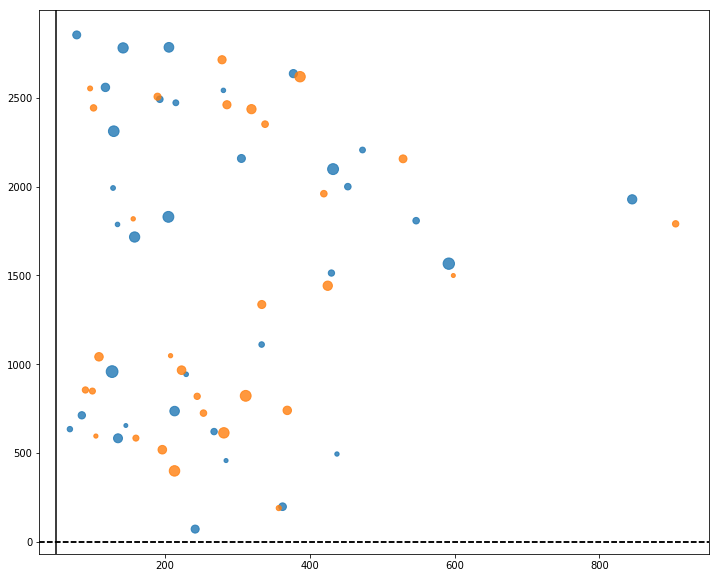

In [125]:
cond1 =  (d_centroid_v>.5)&(d_angle_v<90)
cond2 = (d_centroid_v>.5)&(d_angle_v>90)

plt.figure(figsize=(12,10))
plt.scatter(Tab_ma.dist_edge[cond1], Tab_ma.dist_cen[cond1], s=2**(Tab_ma.mag_auto[cond1]-20)*30, alpha=0.8)
plt.scatter(Tab_ma.dist_edge[cond2], Tab_ma.dist_cen[cond2], s=2**(Tab_ma.mag_auto[cond2]-20)*30, alpha=0.8)
# plt.axhline(0.228,color="k")
plt.axvline(50,color="k")
plt.axhline(0.24,color="k",ls="--")
plt.axhline(0.216,color="k",ls="--")

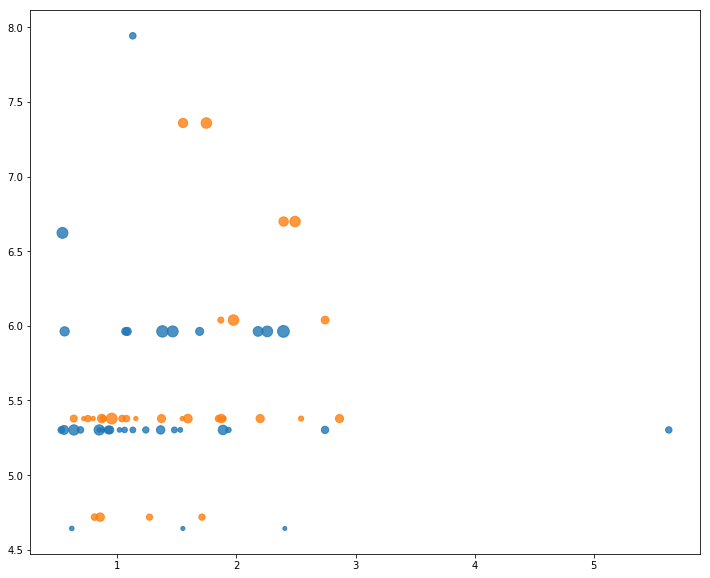

In [123]:
cond1 =  (d_centroid_v>.5)&(d_angle_v<90)
cond2 = (d_centroid_v>.5)&(d_angle_v>90)

plt.figure(figsize=(12,10))
plt.scatter(Tab_ma.diff_centroid[cond1], Tab_ma.R_petro[cond1]+np.random.rand(1)*0.1, s=2**(Tab_ma.mag_auto[cond1]-20)*30, alpha=0.8)
plt.scatter(Tab_ma.diff_centroid[cond2], Tab_ma.R_petro[cond2]+np.random.rand(1)*0.1, s=2**(Tab_ma.mag_auto[cond2]-20)*30, alpha=0.8)
# plt.axhline(0.90,color="k")

In [199]:
def draw_angle_compare(diff_angles_v, diff_centroids_v, diff_angles_c, diff_centroids_c, crit=[0.5,0.75], b=9):
    p = crit[0]#np.percentile(diff_centroids_c, crit[0]*100)
    q = crit[1]#np.percentile(diff_centroids_c, crit[1]*100)
#     plt.hist(diff_angles_v,bins=np.linspace(0,180,b), color='orange',
#         normed=True, histtype="step", linestyle=":", linewidth=4, alpha=0.5, label="candidate all")
    plt.hist(diff_angles_c, bins=np.linspace(0,180,b), 
             color="gray",facecolor="lightgray",fill=True,
             normed=True, histtype="step", linestyle="-", linewidth=4, alpha=0.8, 
             label="Non-Candidate: %d"%len(diff_angles_c))  
    plt.hist(diff_angles_v[diff_centroids_v>p]+2, bins=np.linspace(0,180,b)+2,
             color='steelblue',#hatch='-',
             normed=True, histtype="step", linewidth=4, alpha=0.8, 
             label="Candidate ($\Delta\,d$>%.1f): %d"%(p, len(diff_angles_v[diff_centroids_v>p]))) 
    plt.hist(diff_angles_v[diff_centroids_v>q]-2, bins=np.linspace(0,180,b)-2,
             color='orange',hatch='/',
             normed=True, histtype="step", linewidth=4, alpha=0.8, 
             label="Candidate ($\Delta\,d$>%.1f): %d"%(q, len(diff_angles_v[diff_centroids_v>q]-2))) 
#     plt.hist(diff_angles_c[diff_centroids_c>q], bins=np.linspace(0,180,b), color="k",
#          normed=True, histtype="step", linewidth=3, alpha=0.9, label="control > %.1f pix"%q)

    plt.xlabel("$\\theta$",fontsize=14)
    plt.legend(loc=9,fontsize=11)

In [19]:
from scipy.stats import kstest,ks_2samp,norm, anderson_ksamp
# 2APER A2390C + A2390E + A2390W
p = 1.
q = 1.5

print("K-S: p-value=%.4f"%ks_2samp(d_angle_v[d_centroid_v>p], d_angle_c).pvalue)
print("K-S: p-value=%.4f"%ks_2samp(d_angle_v[d_centroid_v>q], d_angle_c).pvalue)

print(anderson_ksamp([d_angle_v[d_centroid_v>p],d_angle_c]))
print(anderson_ksamp([d_angle_v[d_centroid_v>q],d_angle_c]))

K-S: p-value=0.1749
K-S: p-value=0.2844
Anderson_ksampResult(statistic=-0.3574707593931817, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.5065711486756617)
Anderson_ksampResult(statistic=-0.7677422506026376, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.7853457078538395)


In [106]:
from scipy.stats import kstest,ks_2samp,norm, anderson_ksamp
# 1APER A2390C + A2390E + A2390W
p = 0.5
q = 1.5

print("K-S: p-value=%.4f"%ks_2samp(d_angle_v[d_centroid_v>p], d_angle_c).pvalue)
print("K-S: p-value=%.4f"%ks_2samp(d_angle_v[d_centroid_v>q], d_angle_c).pvalue)

print(anderson_ksamp([d_angle_v[d_centroid_v>p],d_angle_c]))
print(anderson_ksamp([d_angle_v[d_centroid_v>q],d_angle_c]))

K-S: p-value=0.3322
K-S: p-value=0.1369
Anderson_ksampResult(statistic=-0.0860953676162759, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.380818820162226)
Anderson_ksampResult(statistic=0.5311403470820911, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.2017839511488037)


In [148]:
from scipy.stats import kstest,ks_2samp,norm, anderson_ksamp
# m2APER A2390C + A2390E + A2390W
p = 0.5
q = 1.
print("K-S: p-value=%.4f"%ks_2samp(d_angle_v[d_centroid_v>p], stats.uniform.rvs(size=1000)).pvalue)
print("K-S: p-value=%.4f"%ks_2samp(d_angle_v[d_centroid_v>p], d_angle_c).pvalue)
print("K-S: p-value=%.4f"%ks_2samp(d_angle_v[d_centroid_v>q], d_angle_c).pvalue)

print(anderson_ksamp([d_angle_v[d_centroid_v>p],d_angle_c]))
print(anderson_ksamp([d_angle_v[d_centroid_v>q],d_angle_c]))

K-S: p-value=0.0000
K-S: p-value=0.7133
K-S: p-value=0.4858
Anderson_ksampResult(statistic=-0.45119974547755076, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.5595220483259056)
Anderson_ksampResult(statistic=-0.1414557718925025, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.40352184154635806)


In [113]:
from scipy.stats import kstest,ks_2samp,norm, anderson_ksamp
# 2APER A2390C + A2390E + A2390W
p = .5
q = 1.

print("K-S: p-value=%.4f"%ks_2samp(d_angle_v[d_centroid_v>p], d_angle_c).pvalue)
print("K-S: p-value=%.4f"%ks_2samp(d_angle_v[d_centroid_v>q], d_angle_c).pvalue)

print(anderson_ksamp([d_angle_v[d_centroid_v>p],d_angle_c]))
print(anderson_ksamp([d_angle_v[d_centroid_v>q],d_angle_c]))

K-S: p-value=0.3595
K-S: p-value=0.6447
Anderson_ksampResult(statistic=-0.3055877094208384, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.4795382389964733)
Anderson_ksampResult(statistic=-0.25496841565967865, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.4546143827058635)


## APER A2390C + A2390E + A2390W + A2465C

In [15]:
# Merge A2465
df2 = pd.read_csv("./A2465C/centroid_analysis_A2465C_2aper_all_mscaled.csv")
df2.ID = df2.ID.astype("str")+"D"
Tab_v_2 = df2[(df2.type=='v')]
Tab_m_2 = pd.merge(Tab_ma, Tab_v_2[(abs(Tab_v_2.redshift-0.245)<0.012)], how="outer")
Tab_c_2 = pd.merge(Tab_mc, df2[(df2.type=='c')], how="outer")

d_centroid_v = Tab_m_2.diff_centroid
d_centroid_c = Tab_c_2.diff_centroid
d_angle_v = Tab_m_2.diff_angle
d_angle_c = Tab_c_2.diff_angle

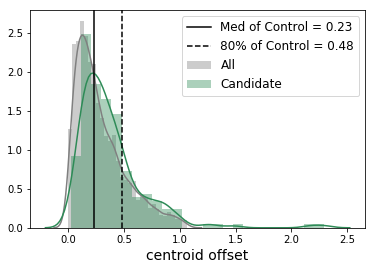

In [358]:
draw_centroid_offset(d_centroid_v, d_centroid_c,crit=[0.5,0.8])

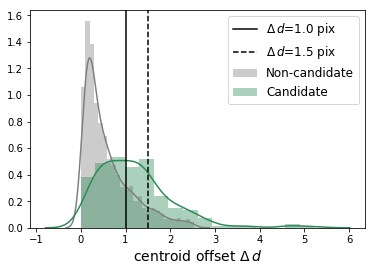

In [16]:
draw_centroid_offset(d_centroid_v, d_centroid_c,crit=[1.,1.5])
# plt.savefig("/home/qliu/Pictures/20190312/offset_A2390C+W+E+A2465C.pdf",dpi=100)

# of offset > 50% : 150
# of offset > 80% : 54


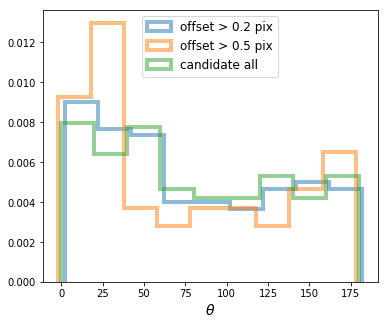

In [375]:
# APER
plt.figure(figsize=(6,5))
draw_angle_candidate(d_angle_v, d_centroid_v,d_centroid_c, crit=[0.5, 0.8], b=10)

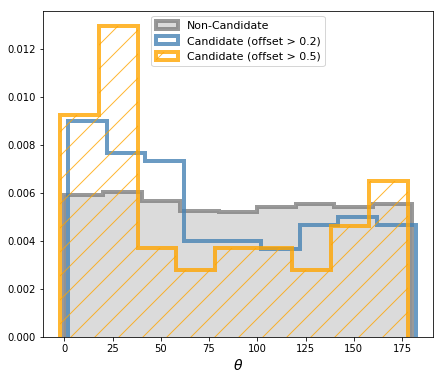

In [376]:
# Aper
plt.figure(figsize=(7,6))
draw_angle_compare(d_angle_v, d_centroid_v, 
                   d_angle_c, d_centroid_c, crit=[0.5,0.8], b=10)

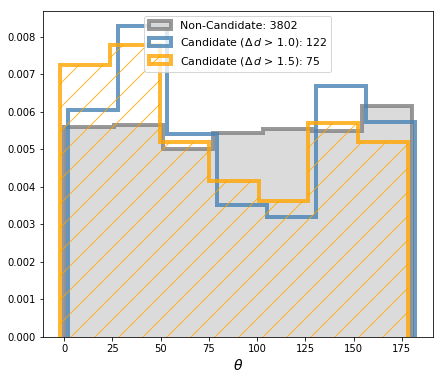

In [28]:
# Aper
plt.figure(figsize=(7,6))
draw_angle_compare(d_angle_v, d_centroid_v, 
                   d_angle_c, d_centroid_c, crit=[1.,1.5], b=8)
# plt.savefig("/home/qliu/Pictures/20190312/A2390C+W+E+A2465C.pdf",dpi=100)

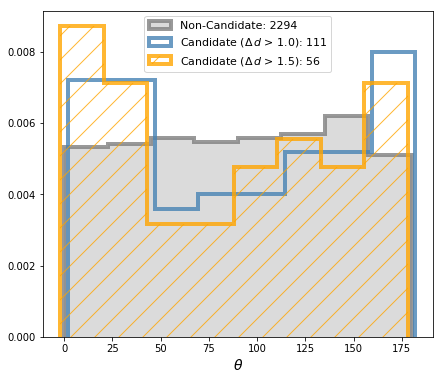

In [18]:
# Aper
plt.figure(figsize=(7,6))
draw_angle_compare(d_angle_v, d_centroid_v, 
                   d_angle_c, d_centroid_c, crit=[1.,1.5], b=9)

In [380]:
from scipy.stats import kstest,ks_2samp,norm, anderson_ksamp
# APER A2390C + A2390E + A2390W + A2465C
p = np.percentile(d_centroid_c, 50)
q = np.percentile(d_centroid_c, 80)

print("K-S: p-value=%.4f"%ks_2samp(d_angle_v[d_centroid_v>p], d_angle_c).pvalue)
print("K-S: p-value=%.4f"%ks_2samp(d_angle_v[d_centroid_v>q], d_angle_c).pvalue)

print(anderson_ksamp([d_angle_v[d_centroid_v>p],d_angle_c]))
print(anderson_ksamp([d_angle_v[d_centroid_v>q],d_angle_c]))

K-S: p-value=0.0038
K-S: p-value=0.0071
Anderson_ksampResult(statistic=3.943237683343263, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.008533287656420242)
Anderson_ksampResult(statistic=2.6001366637664365, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.027627697563615446)


In [26]:
from scipy.stats import kstest,ks_2samp,norm, anderson_ksamp
# APER A2390C + A2390E + A2390W + A2465C
p = 1
q = 1.5

print("K-S: p-value=%.4f"%ks_2samp(d_angle_v[d_centroid_v>p], d_angle_c).pvalue)
print("K-S: p-value=%.4f"%ks_2samp(d_angle_v[d_centroid_v>q], d_angle_c).pvalue)

print(anderson_ksamp([d_angle_v[d_centroid_v>p],d_angle_c]))
print(anderson_ksamp([d_angle_v[d_centroid_v>q],d_angle_c]))

K-S: p-value=0.2329
K-S: p-value=0.3615
Anderson_ksampResult(statistic=0.034598444168837776, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.33583356284958915)
Anderson_ksampResult(statistic=0.4875274377787238, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.21091216586340508)


In [180]:
from scipy.stats import kstest,ks_2samp,norm, anderson_ksamp
# APER A2390C + A2390E + A2390W + A2465C
p = 1
q = 1.5

print("K-S: p-value=%.4f"%ks_2samp(d_angle_v[d_centroid_v>p], d_angle_c).pvalue)
print("K-S: p-value=%.4f"%ks_2samp(d_angle_v[d_centroid_v>q], d_angle_c).pvalue)

print(anderson_ksamp([d_angle_v[d_centroid_v>p],d_angle_c]))
print(anderson_ksamp([d_angle_v[d_centroid_v>q],d_angle_c]))

K-S: p-value=0.1970
K-S: p-value=0.1268
Anderson_ksampResult(statistic=1.1559480514425893, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.1081922969342422)
Anderson_ksampResult(statistic=0.895827266228459, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.13990987061002305)


In [56]:
from astropy.io import ascii
from astropy.table import Table
ascii.write(Table.from_pandas(Tab_m_2), "Candidate_A2390+A2465C.dat", 
             formats={"ID":'%s', "ra":"%.3f","dec":"%.3f",
                      "redshift":"%.3f", "SNR_Ha":"%.2f","SNR_OIII":"%.2f",
                      "dist_edge":"%.2f","diff_angle":"%.2f","diff_centroid":"%.2f", "type":"%s"})

In [53]:
Table.from_pandas(Tab_m_2)

ID,ra,dec,redshift,SNR_Ha,SNR_OIII,dist_edge,diff_angle,diff_centroid,type
str5,float64,float64,float64,float64,float64,float64,float64,float64,str1
325C,328.41362477995165,17.609707302548113,0.2309339651547007,20.71620328239455,18.137255688607787,223.39171707831972,132.19922876759296,1.6620562552755054,v
375C,328.45842065574385,17.61789765164155,0.22581352331372115,12.96542015895985,10.640715189611514,208.2107743683789,161.72035871086436,0.6035679164807243,v
397C,328.45483961044744,17.622009114763838,0.22621000532135174,25.541735161262906,9.151122769220745,221.21149622264213,12.200822315592632,0.3014117376364424,v
463C,328.3926514624733,17.622804756203827,0.22459025303261085,9.812738236393075,5.632055653923582,311.8847034507463,174.1504363802132,0.6692499623139201,v
583C,328.3115781565927,17.634870633954264,0.22621000532135174,53.562630745781654,7.54927307746946,77.44061138937363,151.92412427159766,0.09412401059587493,v
600C,328.47954455696737,17.63714869483623,0.22938186138239666,16.84375573588939,5.1023228904915285,109.45189278824736,154.17483826754793,1.5858640409695768,v
633C,328.45291360493013,17.639550169415685,0.2293480371241782,8.86252202137041,7.74128489936816,244.91150605330898,169.4276439158996,1.499305266138237,v
646C,328.3675340676815,17.638939211175398,0.2377079835426396,20.375058363564104,17.67657733481649,369.22125032946036,162.99521690841078,0.7663904640774765,v
684C,328.30887305377496,17.640929798317078,0.21867684717637006,8.223352773049987,3.3195555869820192,49.36995123807602,87.61536354485708,1.3866429453004971,v
